Dataset:
https://www.kaggle.com/shaunthesheep/microsoft-catsvsdogs-dataset

The dataset isn't deep-learning-compatible by default, here's how to preprocess it:

Video: https://www.youtube.com/watch?v=O7EV2BjOXus&ab_channel=BetterDataScience

Article:https://towardsdatascience.com/tensorflow-for-image-classification-top-3-prerequisites-for-deep-learning-projects-34c549c89e42

Code: https://github.com/better-data-science/TensorFlow/blob/main/008_CNN_001_Working_With_Image_Data.ipynb


Before you start

I got TensorFlow errors during training because a couple of images were corrupted.

Before continuing, please delete the following images:

data\train\cat\666.jpg

data\train\dog\11702.jpg

In [2]:
import os
import pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(42)

from PIL import Image, ImageOps
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

2023-01-29 08:12:20.300282: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Normalizing image data

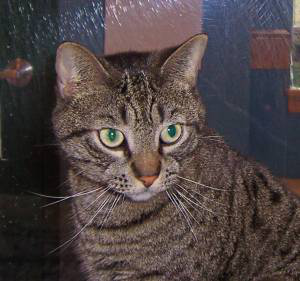

In [3]:
img1 = Image.open('data/train/cat/1.jpg')
display(img1)

In [4]:
np.array(img1).shape

(281, 300, 3)

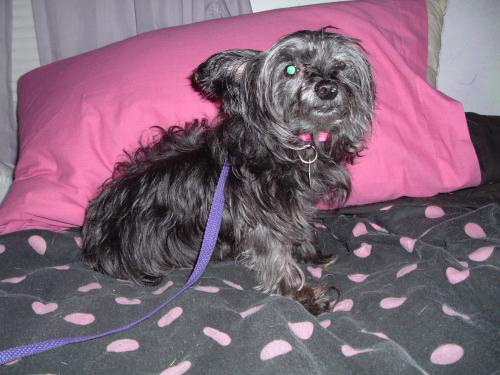

In [5]:
img2 = Image.open('data/train/dog/0.jpg')
display(img2)

In [6]:
np.array(img2).shape

(375, 500, 3)

It's 281 pixels wide, 300 pixels tall, and has 3 color channels

Let's load in another image and see if the same applies:

The second image is much larger

Neural network doesn't like that - it expects images (arrays) of identical sizes

You'll see later how to resize them on the fly

First, let's see how a single image looks like when represented as an array:

In [7]:
np.array(img2)

array([[[117, 115, 126],
        [117, 115, 126],
        [119, 117, 130],
        ...,
        [132, 132, 142],
        [131, 131, 141],
        [131, 131, 141]],

       [[118, 116, 127],
        [117, 115, 126],
        [119, 117, 130],
        ...,
        [134, 134, 144],
        [133, 133, 143],
        [133, 133, 143]],

       [[119, 117, 128],
        [118, 116, 127],
        [120, 118, 131],
        ...,
        [136, 136, 146],
        [135, 135, 145],
        [135, 135, 145]],

       ...,

       [[ 75,  80,  84],
        [ 70,  75,  79],
        [ 69,  74,  78],
        ...,
        [ 74,  82,  85],
        [ 70,  78,  81],
        [ 67,  75,  78]],

       [[ 74,  79,  83],
        [ 68,  73,  77],
        [ 65,  70,  74],
        ...,
        [ 66,  74,  77],
        [ 67,  75,  78],
        [ 68,  76,  79]],

       [[ 70,  75,  79],
        [ 67,  72,  76],
        [ 66,  71,  75],
        ...,
        [ 69,  77,  80],
        [ 67,  75,  78],
        [ 65,  73,  76]]

In [8]:
np.array(img2) / 255.0

array([[[0.45882353, 0.45098039, 0.49411765],
        [0.45882353, 0.45098039, 0.49411765],
        [0.46666667, 0.45882353, 0.50980392],
        ...,
        [0.51764706, 0.51764706, 0.55686275],
        [0.51372549, 0.51372549, 0.55294118],
        [0.51372549, 0.51372549, 0.55294118]],

       [[0.4627451 , 0.45490196, 0.49803922],
        [0.45882353, 0.45098039, 0.49411765],
        [0.46666667, 0.45882353, 0.50980392],
        ...,
        [0.5254902 , 0.5254902 , 0.56470588],
        [0.52156863, 0.52156863, 0.56078431],
        [0.52156863, 0.52156863, 0.56078431]],

       [[0.46666667, 0.45882353, 0.50196078],
        [0.4627451 , 0.45490196, 0.49803922],
        [0.47058824, 0.4627451 , 0.51372549],
        ...,
        [0.53333333, 0.53333333, 0.57254902],
        [0.52941176, 0.52941176, 0.56862745],
        [0.52941176, 0.52941176, 0.56862745]],

       ...,

       [[0.29411765, 0.31372549, 0.32941176],
        [0.2745098 , 0.29411765, 0.30980392],
        [0.27058824, 0

Data loaders

You can use the ImageDataGenerator class from TensorFlow to specify how the image data will be generated

We'll only apply rescaling - 1 / 255.0

We'll do this for both trianing and validation images:

In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

You can now use this generator to load in data from a directory

Specify the directory path, and a siye to which each image will be resized

224x224 works well with neural networks, especially with transfer learning models (more on these in a couple of notebooks)

Set class_mode='categorical', since we have two distinct classes

Set batch_siye=64 or anything you want, it represents the number of images shown to a neural network at once

The seed parameter is here so you can get the same images as I did:

In [10]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 20031 images belonging to 2 classes.


There are 20030 images in the training folder divided into two classes - as reported by the loader

The train_data is basically a Python generator object

You can call next() on it to get the first batch:

In [11]:
first_batch = train_data.next()

Each batch contains images and labels

Let's check the shape:

In [12]:
first_batch[0].shape, first_batch[1].shape

((64, 3, 224, 224), (64, 2))

So, a single batch contains 64 images, each being 224 pixels wide and tall with 3 color channels

There are 64 corresponding labels, each is an array of two elements - probability of an image being a cat (0) ond a dog (1)

Visualizing a single batch

It's always recommended to visalize your data

The visualize_batch() function, well, visualizes a single batch

There are 64 images in the batch, so the function plots a grid of 8x8 images:

In [24]:
def visualize_batch(batch: tf.keras.preprocessing.image.DirectoryIterator) -> None:
    n = 64
    num_row, num_col = 8, 8
    fig, axes = plt.subplots(num_row, num_col, figsize=(3 * num_col, 3 * num_row))
    
    for i in range(n):
        img = np.array(batch[0][i] * 255, dtype='uint8')
        
        img = img.swapaxes(0, 1)   # added by XUE
        img = img.swapaxes(1, 2)   # added by XUE
        
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()
    return

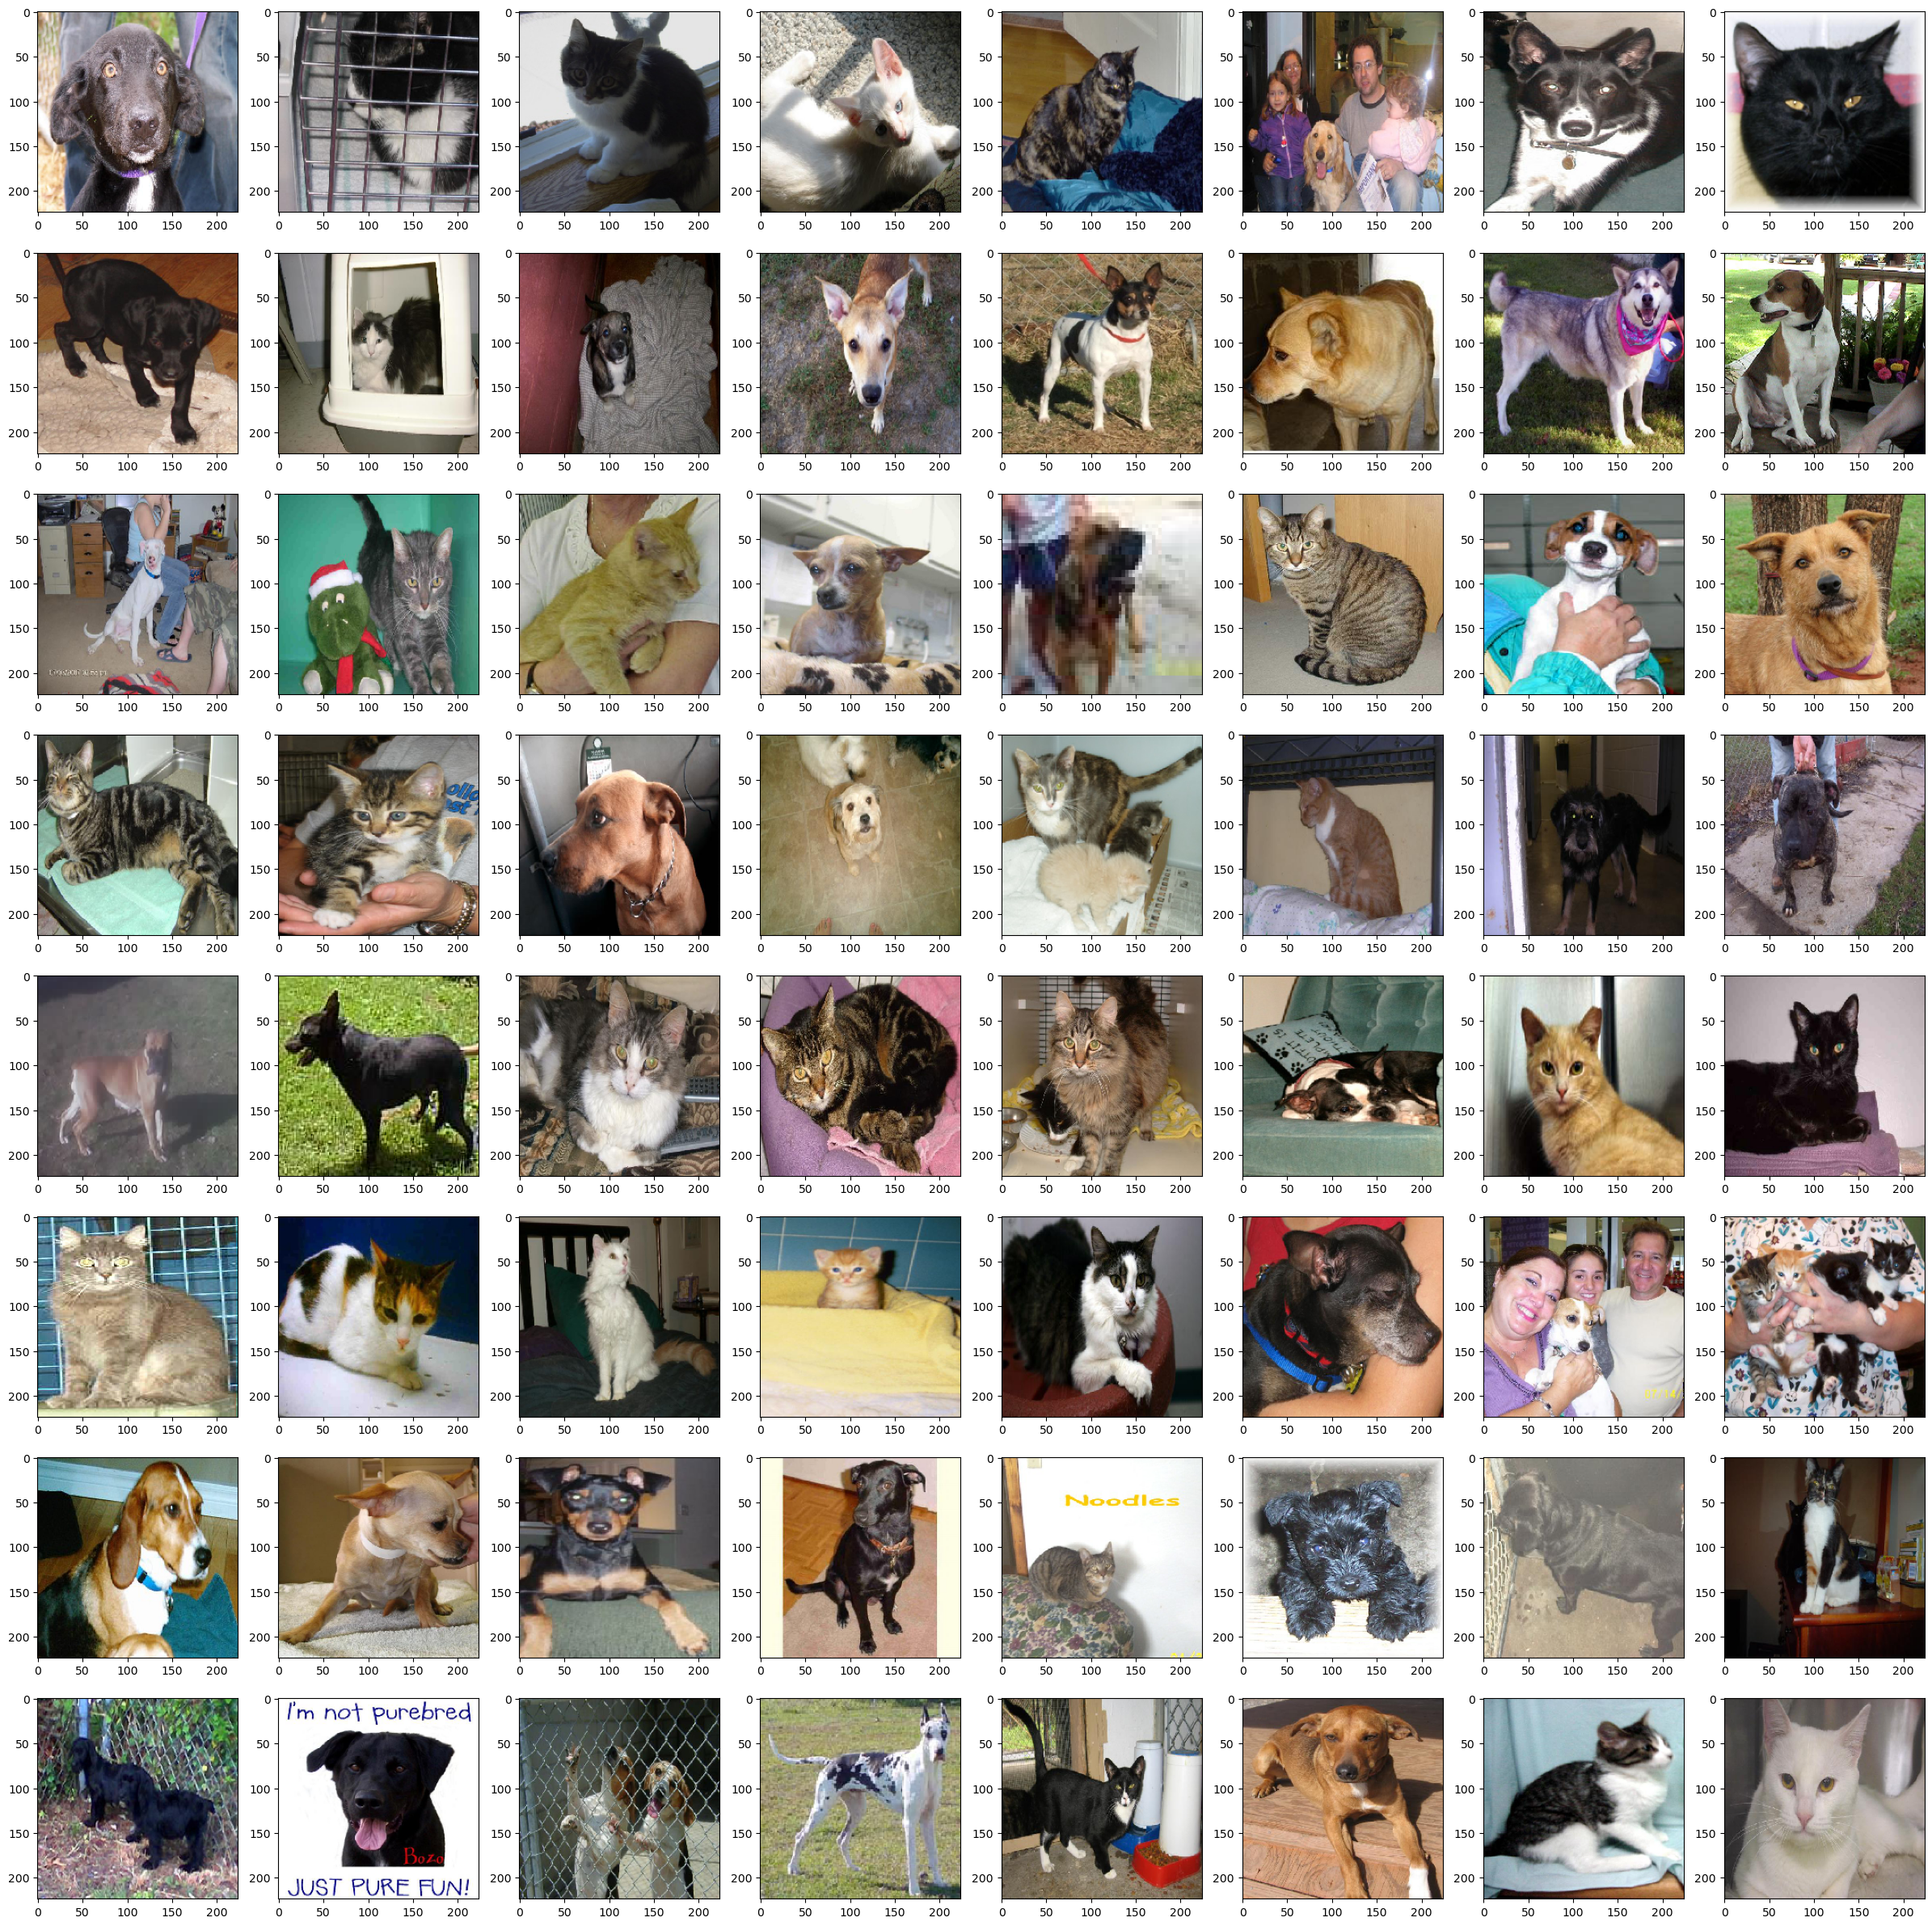

In [25]:
visualize_batch(batch=first_batch)

In [26]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory='data/validation/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 20031 images belonging to 2 classes.
Found 2478 images belonging to 2 classes.


Training a Convolutional model

Just like with regular ANN's (Dense layers), Convolutional Neural Networks boil down to experimentation

You can't know beforehand how many Convolutional layers you'll need, what's the ideal number of filters for each, and what's the optimal kernel size
Convolutional layers are usually followed by a Pooling layer, to reduce the image size

When finished with Convolutional layers, make sure to add a Flatten layer

Add Dense layers as you normally would from there

Keep in mind the ouput layer and the loss function

Use softmax activation at output, as sigmoid only works when you have a single output node

Track loss through categorical cross entropy

We'll train the model for 10 epochs, which is completely random:

In [31]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=16, 
        kernel_size=(3, 3), 
        input_shape=(224, 224, 3), 
        activation='relu',
        data_format='channels_last'  # added by XUE
    ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])



In [32]:
model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)



In [33]:
history_1 = model_1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/max_pooling2d_2/MaxPool' defined at (most recent call last):
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2974, in run_cell
      result = self._run_cell(
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3029, in _run_cell
      return runner(coro)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3256, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3472, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3552, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_25762/928185639.py", line 1, in <cell line: 1>
      history_1 = model_1.fit(
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/layers/pooling/base_pooling2d.py", line 84, in call
      outputs = self.pool_function(
Node: 'sequential_2/max_pooling2d_2/MaxPool'
Default MaxPoolingOp only supports NHWC on device type CPU
	 [[{{node sequential_2/max_pooling2d_2/MaxPool}}]] [Op:__inference_train_function_2161]